## ENV SETUP

1. Install uv (or do it you're own way)
2. Run `uv sync`
3. Run `source .venv/bin/activate`

You're good to go.

# Instructions

The Task : Create the best CadQuery code generator model. 

1. Load the dataset (147K pairs of Images/CadQuery code).
2. Create a baseline model and evaluate it with the given metrics.
3. Enhance by any manner the baseline model and evaluate it again.
4. Explain you choices and possible bottlenecks. 
5. Show what enhancements you would have done if you had more time.

You can do *WHATEVER* you want, be creative, result is not what matters the most. 
Creating new model architectures, reusing ones you used in the past, fine-tuning, etc...

If you are GPU poor, there are solutions. Absolute value is not what matters, relative value between baseline and enhanced model is what matters.

### Data Analysis

Pretty printing has been turned OFF
✅ Dataset loaded successfully!
📊 Train: 147,289 samples | Test: 7,355 samples
🔧 Features: ['image', 'deepcad_id', 'cadquery', 'token_count', 'prompt', 'hundred_subset']
🚀 Starting comprehensive dataset analysis...

1️⃣ Displaying sample images with prompts...


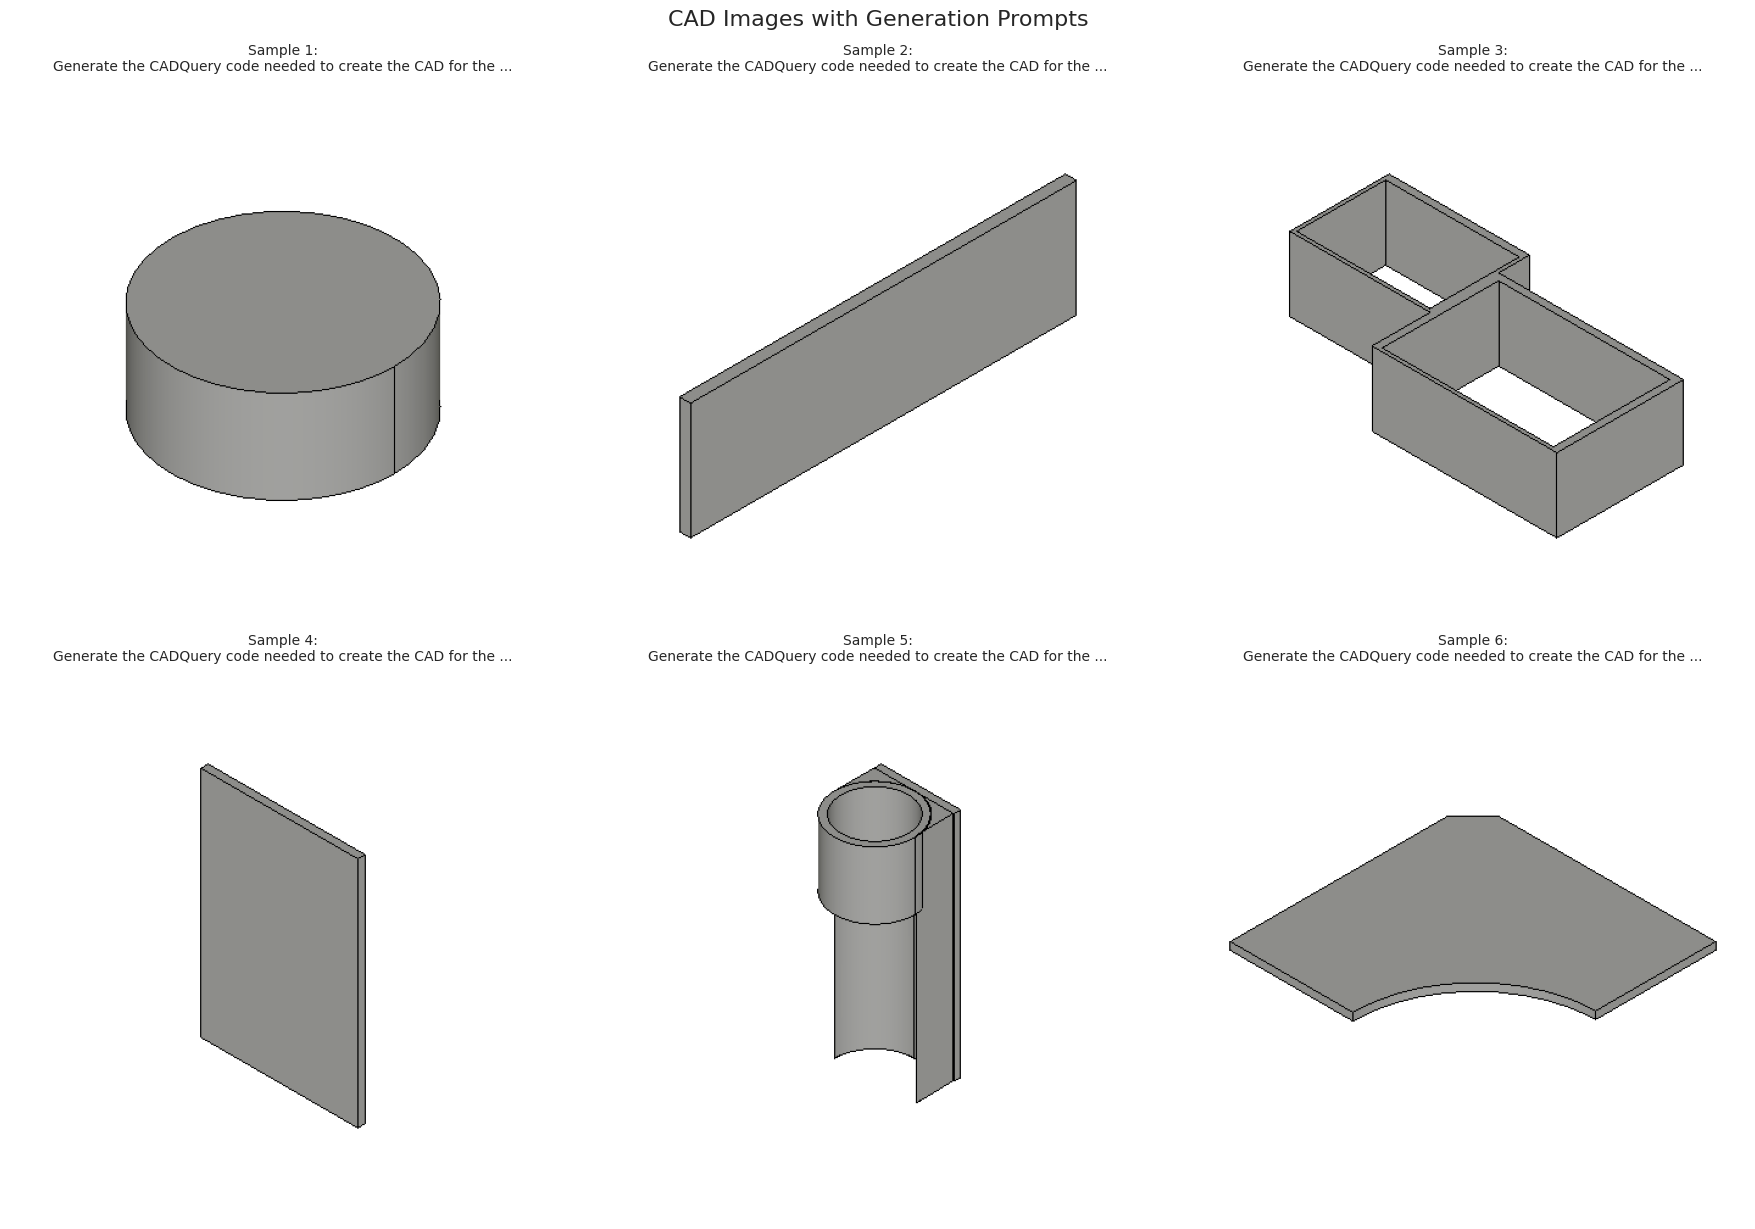


🔍 DETAILED INPUT-OUTPUT SAMPLES

==================== SAMPLE 1 ====================
📷 Image size: (448, 448)
🆔 DeepCAD ID: 0089/00896700
📝 Token count: 1088

💬 PROMPT:
--------------------------------------------------
Generate the CADQuery code needed to create the CAD for the provided image. Just the code,
no other words.

🔧 CADQUERY CODE:
--------------------------------------------------
 1: import cadquery as cq
 2: # Generating a workplane for sketch 0
 3: wp_sketch0 = cq.Workplane(cq.Plane(cq.Vector(-0.5, 0.0, 0.0), cq.Vector(1.0, 0.0, 0.0), cq.Vector(0.0, 0.0, 1.0)))
 4: loop0=wp_sketch0.moveTo(0.14736842105263157, 0.0).threePointArc((0.5, 0.3526315789473684), (0.8526315789473684, 0.0)).lineTo(1.0, 0.0).threePointArc((0.87851984930552, 0.23831147848438172), (0.7052631578947368, 0.4421052631578947)).threePointArc((0.5, 0.5227343374965154), (0.29473684210526313, 0.4421052631578947)).threePointArc((0.12148015069448002, 0.23831147848438172), (0.0, 0.0)).close()
 5: solid0=wp_sketc

In [9]:
%pprint
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datasets import load_dataset
from collections import Counter
import re
import textwrap
from PIL import Image
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

def load_dataset_info():
    """Load and return basic dataset info"""
    ds = load_dataset("CADCODER/GenCAD-Code", num_proc=16, split=["train", "test"], 
                     cache_dir="/Volumes/BIG-DATA/HUGGINGFACE_CACHE")
    
    train_ds, test_ds = ds
    return train_ds, test_ds

def show_sample_images_and_code(dataset, num_samples=6):
    """Display sample images with their corresponding prompts and CADQuery code"""

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Randomly sample indices
    sample_indices = random.sample(range(len(dataset)), num_samples)
    
    for i, idx in enumerate(sample_indices):
        sample = dataset[idx]
        ax = axes[i]
        img = sample['image']
        ax.imshow(img)
        ax.axis('off')
        
        prompt = sample['prompt']
        truncated_prompt = prompt[:60] + "..." if len(prompt) > 60 else prompt
        ax.set_title(f"Sample {i+1}:\n{truncated_prompt}", 
                    fontsize=10, pad=10, wrap=True)
    
    plt.tight_layout()
    plt.suptitle("CAD Images with Generation Prompts", fontsize=16, y=1.02)
    plt.show()

def show_detailed_samples(dataset, num_samples=3):
    """Show detailed input-output examples"""
    print("\n" + "="*100)
    print("🔍 DETAILED INPUT-OUTPUT SAMPLES")
    print("="*100)
    
    sample_indices = random.sample(range(len(dataset)), num_samples)
    
    for i, idx in enumerate(sample_indices):
        sample = dataset[idx]
        
        print(f"\n{'='*20} SAMPLE {i+1} {'='*20}")
        print(f"📷 Image size: {sample['image'].size}")
        print(f"🆔 DeepCAD ID: {sample['deepcad_id']}")
        print(f"📝 Token count: {sample['token_count']}")
        
        print(f"\n💬 PROMPT:")
        print("-" * 50)
        print(textwrap.fill(sample['prompt'], width=90))
        
        print(f"\n🔧 CADQUERY CODE:")
        print("-" * 50)
        code = sample['cadquery']
        # Pretty print the code with line numbers
        lines = code.split('\n')
        for line_num, line in enumerate(lines[:15], 1):  # Show first 15 lines
            print(f"{line_num:2d}: {line}")
        
        if len(lines) > 15:
            print(f"    ... ({len(lines) - 15} more lines)")
        
        print("-" * 100)


def dataset_overview():
    """Show overall dataset statistics"""
    print("\n" + "="*80)
    print("📈 DATASET OVERVIEW")
    print("="*80)
    
    total_samples = len(train_ds) + len(test_ds)
    
    # Sample some data for quick stats
    sample_indices = random.sample(range(len(train_ds)), min(1000, len(train_ds)))
    
    # Calculate approximate statistics
    avg_tokens = np.mean([train_ds[i]['token_count'] for i in sample_indices])
    
    print(f"🎯 Total Dataset Size: {total_samples:,} samples")
    print(f"📚 Training Set: {len(train_ds):,} samples ({len(train_ds)/total_samples*100:.1f}%)")
    print(f"🧪 Test Set: {len(test_ds):,} samples ({len(test_ds)/total_samples*100:.1f}%)")
    print(f"⚡ Average Token Count: {avg_tokens:.1f}")
    

# Load dataset
train_ds, test_ds = load_dataset_info()

print(f"✅ Dataset loaded successfully!")
print(f"📊 Train: {len(train_ds):,} samples | Test: {len(test_ds):,} samples")
print(f"🔧 Features: {list(train_ds.features.keys())}")

print("🚀 Starting comprehensive dataset analysis...\n")

# 1. Show sample images and code
print("1️⃣ Displaying sample images with prompts...")
show_sample_images_and_code(train_ds, 6)

# 2. Show detailed samples
show_detailed_samples(train_ds, 3)

# 3. Dataset overview
dataset_overview()

print("\n✅ Analysis complete!")

### Setups

In [ ]:
import gc
import torch
from datasets import load_dataset
import torchvision.transforms as T
from torch.utils.data import DataLoader
import timm
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch.nn as nn
from tqdm import tqdm
import warnings
import logging
import transformers
from metrics.valid_syntax_rate import evaluate_syntax_rate_simple
from metrics.best_iou import get_iou_best
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

warnings.filterwarnings("ignore")
logging.getLogger("transformers").setLevel(logging.ERROR)
transformers.logging.set_verbosity_error()

torch.cuda.empty_cache()
gc.collect()

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU detected: {torch.cuda.get_device_name(0)}")
    print(f"GPU memory: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
else:
    device = torch.device("cpu")
    print("No GPU detected, using CPU")

### Dataset & Model loaders

In [ ]:
# tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token
prefix_len = 10
max_new_tokens = 500
max_input_length = tokenizer.model_max_length - prefix_len - max_new_tokens


# Load models
print("Loading models...")
vision_encoder = timm.create_model("efficientnet_b2", pretrained=True, num_classes=0).to(device).eval()
lm = AutoModelForCausalLM.from_pretrained("distilgpt2").to(device).eval()
lm.config.max_length = tokenizer.model_max_length


# Load dataset
print("Loading dataset...")
train_val_ds, original_test_ds = load_dataset("CADCODER/GenCAD-Code", split=["train", "test"])

print(f"Original train samples: {len(train_val_ds)}")
train_val_ds_subset = train_val_ds.select(range(8000))
print(f"Using first {len(train_val_ds_subset)} samples for training/validation")

split = train_val_ds_subset.train_test_split(test_size=0.2, seed=42)
train_ds = split["train"]
val_ds = split["test"]

print(f"Train samples: {len(train_ds)}, Val samples: {len(val_ds)}, Test samples: {len(original_test_ds)}")

transform = T.Compose([
    T.Resize((224, 224)), 
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class CADPairDataset(torch.utils.data.Dataset):
    def __init__(self, hf_ds, transform, tokenizer):
        self.ds = hf_ds
        self.transform = transform
        self.tokenizer = tokenizer
    
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, i):
        img = self.transform(self.ds[i]["image"])
        code = self.ds[i]["cadquery"]
        tokens = self.tokenizer(code, return_tensors="pt", truncation=True, padding="max_length", max_length=max_input_length)
        return img, tokens.input_ids.squeeze(), tokens.attention_mask.squeeze()


train_loader = DataLoader(CADPairDataset(train_ds, transform, tokenizer), batch_size=16, shuffle=True)
val_loader = DataLoader(CADPairDataset(val_ds, transform, tokenizer), batch_size=16, shuffle=False)
test_loader = DataLoader(CADPairDataset(original_test_ds, transform, tokenizer), batch_size=16, shuffle=False)

class PrefixAdapter(nn.Module):
    def __init__(self, input_dim, hidden_size, prefix_len=10):
        super().__init__()
        self.prefix_len = prefix_len
        self.hidden_size = hidden_size
        self.projection = nn.Linear(input_dim, 768)  
        self.mlp = nn.Sequential(
            nn.Linear(768, 768),
            nn.ReLU(),
            nn.Linear(768, prefix_len * hidden_size)
        )
    
    def forward(self, x):
        x = self.projection(x)
        out = self.mlp(x)
        return out.view(-1, self.prefix_len, self.hidden_size)

# Get feature dimension from EfficientNet-B2
with torch.no_grad():
    sample_input = torch.randn(1, 3, 224, 224).to(device)
    vision_feats_dim = vision_encoder(sample_input).shape[-1]

adapter = PrefixAdapter(vision_feats_dim, lm.config.hidden_size, prefix_len=prefix_len).to(device)
optimizer = torch.optim.AdamW(adapter.parameters(), lr=5e-5)

### Training & Validation Phases

In [1]:

# Freeze the backbones
vision_encoder.eval()
lm.eval()

loaders = {
    "train": train_loader,
    "val": val_loader
}


# Training + validation loop
for epoch in range(7):

    train_loss_sum = 0.0
    train_steps = 0
    all_preds = []
    all_gts = []
    
    for phase, loader in loaders.items():
        is_train = (phase == "train")
        adapter.train() if is_train else adapter.eval()
        lm.train() if is_train else lm.eval()
        
        for imgs, input_ids, attn_mask in tqdm(loader, desc=f"Epoch {epoch} - {phase.capitalize()}", leave=False):
            imgs, input_ids, attn_mask = imgs.to(device), input_ids.to(device), attn_mask.to(device)
            
            with torch.set_grad_enabled(is_train):

                with torch.no_grad():
                    vision_feats = vision_encoder(imgs)
                
                prefix_tokens = adapter(vision_feats)
                
                inputs_embeds = torch.cat(
                    [prefix_tokens, lm.transformer.wte(input_ids)],
                    dim=1
                )
                
                extended_mask = torch.cat(
                    [
                        torch.ones((input_ids.size(0), prefix_tokens.size(1)),
                                   dtype=attn_mask.dtype, device=device),
                        attn_mask
                    ],
                    dim=1
                )

                extended_mask = extended_mask.bool()
                prefix_labels = torch.full(
                    (input_ids.size(0), prefix_tokens.size(1)), 
                    fill_value=-100, 
                    dtype=input_ids.dtype, 
                    device=device
                )
                extended_labels = torch.cat([prefix_labels, input_ids], dim=1)
                
                if is_train:
                    outputs = lm(
                        inputs_embeds=inputs_embeds,
                        attention_mask=extended_mask,
                        labels=extended_labels,  
                    )
                    loss = outputs.loss
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    
                    train_loss_sum += loss.item()
                    train_steps += 1
                
                else:
                    with torch.no_grad():  
                        generated_ids = lm.generate(
                             inputs_embeds=inputs_embeds,
                             attention_mask=extended_mask,
                             max_new_tokens=max_new_tokens,
                             do_sample=False,
                             pad_token_id=tokenizer.pad_token_id,
                             use_cache=False
                         )
                        
                        prefix_len_actual = prefix_tokens.size(1)
                        generated_without_prefix = generated_ids[:, prefix_len_actual:]
                        
                        preds = tokenizer.batch_decode(
                            generated_without_prefix, skip_special_tokens=True
                        )
                        gts = tokenizer.batch_decode(
                            input_ids, skip_special_tokens=True
                        )
                        all_preds.extend(preds)
                        all_gts.extend(gts)
            
                
    avg_train_loss = train_loss_sum / train_steps

    codes = {f"pred_{i}": p for i, p in enumerate(all_preds)}
    vsr = evaluate_syntax_rate_simple(codes)
    ious = []
    for gt, pred in zip(all_gts, all_preds):
         try:
             ious.append(get_iou_best(gt, pred))
         except ValueError as e:
             print(f"Warning: skipping IOU for this pair due to error: {e}")
             ious.append(0.0)
             
    mean_iou = sum(ious) / len(ious) if ious else 0.0

    print(
        f"Epoch {epoch} [train] → loss: {avg_train_loss:.4f}  "
        f"[val] → VSR: {vsr:.3f}, IOU: {mean_iou:.3f}"
    )

GPU detected: NVIDIA RTX 6000 Ada Generation
GPU memory: 47.4 GB
Loading models...
Loading dataset...
Original train samples: 147289
Using first 8000 samples for training/validation
Train samples: 6400, Val samples: 1600, Test samples: 7355


Epoch 0 [train] → loss: 2.0368  [val] → VSR: 0.000, IOU: 0.000


Epoch 1 [train] → loss: 1.1391  [val] → VSR: 0.000, IOU: 0.000


Epoch 2 [train] → loss: 1.0088  [val] → VSR: 0.000, IOU: 0.000


Epoch 3 [train] → loss: 0.9491  [val] → VSR: 0.000, IOU: 0.000


Epoch 4 [train] → loss: 0.9021  [val] → VSR: 0.000, IOU: 0.000


Epoch 5 [train] → loss: 0.8579  [val] → VSR: 0.000, IOU: 0.000


Epoch 6 [train] → loss: 0.8178  [val] → VSR: 0.000, IOU: 0.000


### Context

I began by selecting some large, high-performing models (CLIP ViT-B/16, codegen-350M-mono), but I ran into an issue with the tokenizer that significantly slowed me down, but I stuck with the time of the training which was estimated by 14 hours. Eventually, I decided to switch to a slightly smaller model, and I successfully could train the models using 7 epoches but the run has been terminated after the 6th epoch as shown above. 

### Summary

The model combines a frozen EfficientNet-B2 vision encoder (pretrained on ImageNet) with a small trainable “prefix adapter” MLP that maps image features into a sequence of hidden‐size embeddings, which are prepended to DistilGPT-2’s token embeddings; during training only the adapter is updated via AdamW (5 × 10⁻⁵) over a 90/10 split of a 8000-sample subset for training and validation dataset (plus a full test dataset), using cross-entropy loss on the code tokens (prefix positions masked out). 

In validation, image features are converted to prefix embeddings, concatenated to the token embeddings, and passed to lm.generate with a fixed max_new_tokens budget to produce CAD code; those outputs are decoded, stripped of prefixes, and evaluated by the examiner’s metrics—Valid Syntax Rate via evaluate_syntax_rate_simple and mean best-IOU via get_iou_best (with any errors scored as zero)—yielding per-epoch training loss, VSR, and IOU scores.

#### Perforamance Analysis

According to the training logs, the training loss is steadily decreasing, indicating that the model is learning effectively. However, the two evaluation metrics on the validation dataset are not showing any improvement. This suggests that we may need to extend the training duration to allow the model to generalize better, or alternatively, we should consider increasing the size of the dataset while keeping the same model architecture to enhance validation performance.

#### Future Enhancements

1. Train on the full dataset: Use every available example rather than a small subset to improve generalization and prevent overfitting.
2. Swap in CLIP or BLIP vision encoders: Leverage CLIP (e.g. ViT-B/16 pre‐aligned with text) or BLIP (vision–language pretrained) for stronger image–code grounding.
3. Fine-tune CAD-specific VLMs: Experiment with models trained on CAD syntax and imagery, such as the [Kamel773/CAD\_Code\_Generation](https://github.com/Kamel773/CAD_Code_Generation) repo.
4. Use code-fence prompt templates: Prepend “\`\`\`python” fences or minimal function stubs to enforce proper syntax, indentation, and imports.
5. Adopt a CAD-aware tokenizer: Customize BPE merges or train a SentencePiece model on Python/CAD code to better handle operators, units, and identifiers.

